In [1]:
#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install requests pandas numpy matplotlib


# TODOLIST
# - Study brainwave wavelengths, produce material to explain theory
# - Grab a few nice screenies as example
# - Real-time connection with streams?
# - How to read spectrograms?
# DONE: - Need to normalize recording time, so each recording would be same length. 10 minutes would probably do nicely.
# DONE: - To plot them together, I'd need to normalize the timeline, too, starting from 0, then based on offset (timestamp)


<Figure size 1080x360 with 0 Axes>

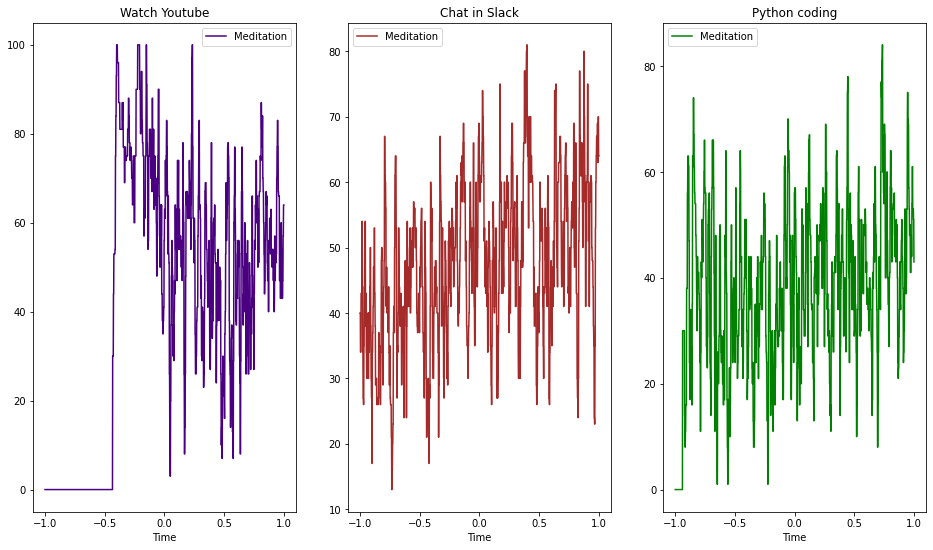

In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
from matplotlib.pyplot import figure

data_path1 = "arto_watch_youtube_2020-03-24T09:37:03.dat"
data_path2 = "arto_chatting_slack_2020-03-24T09:48:28.dat"
data_path3 = "arto_coding_python_2020-03-31T09:57:06.dat"


def read_and_fix_data(path):
    """
    Read csv file, normalize timestamp to a new column, Time, 
    so that timescale is comparable
    """
    df = pd.read_csv(path,header=0)
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64')
    max_a = df.Timestamp.max()
    min_a = df.Timestamp.min()
    min_norm = -1
    max_norm =1
    df['Time'] = (df.Timestamp- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm    
    return df


def plot_df(df, ax, stat, label, color):
    df.plot(kind='line',
        x='Time',
        y=stat,
        title=label,
        color=color,
        ax=ax)

    

df1 = read_and_fix_data(data_path1)
df2 = read_and_fix_data(data_path2)
df3 = read_and_fix_data(data_path3)

#print(plt.style.available)
#plt.style.use('dark_background') 

#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]
plt.figure(figsize=(15,5))
fig, ax = plt.subplots(figsize=(16,9),ncols=3)

brainwave_type='Meditation'
# Meditation, Attention, delta, theta, low-alpha, high-alpha, low-beta, high-beta, low-gamma, mid-gamma
plot_df(df1, ax[0], brainwave_type, 'Watch Youtube','Indigo')
plot_df(df2, ax[1], brainwave_type, 'Chat in Slack','Brown')
plot_df(df3, ax[2], brainwave_type, 'Python coding','Green')
    
#fig.savefig('ThetaComparison.png',format="png")

plt.show()

#plt.close()


In [14]:
#fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
#xfmt = md.DateFormatter('%M:%S')
#ax1.xaxis.set_major_formatter(xfmt)
#ax1.xaxis_date()
#ax1.plot(eeg.index, eeg.raw); ax1.set_title('Raw EEG')
#ax2.specgram(eeg['Raw'], Fs=25); ax2.set_title('Spectrogram'); ax2.set_ylabel('Freq (Hz)');
#ax2.set_xlabel('Time (s)');




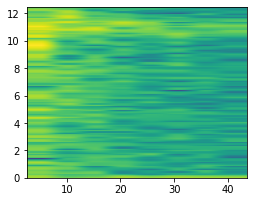

In [21]:
ax = plt.specgram(df1['Raw'], Fs=25); 
#ax.set_title('Spectrogram');
#ax.set_ylabel('Raw');
#ax.set_xlabel('Timestamp');